<a href="https://colab.research.google.com/github/SuyeonSim/Data-analystic-Project/blob/main/%5BGitHub%5D_Customer_AOV_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **github 업로드를 위한 더미 데이터 생성**

* 보안상 더미데이터로 업로드하였으며, 실제 분석에서는 고객 행동 데이터가 사용되었습니다.

In [32]:
pip install faker pandas

In [33]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [34]:
import pandas as pd
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker('ko_KR')

def generate_time_diverse_data(row_count=30):
    data = []

    # 1. 날짜 범위 설정
    start_date = datetime(2023, 2, 6)
    end_date = datetime(2026, 2, 6)
    date_range_days = (end_date - start_date).days

    fake_catalog = {
        "리빙": ["올라운드 세라믹 냄비", "미니멀리스트 식기세트", "우드 그레인 조리도구"],
        "가전": ["스마트 에어 써큘레이터", "무선 핸디 청소기", "에코 프렌들리 가습기"],
        "잡화": ["데일리 캔버스 토트백", "오가닉 코튼 타월세트", "프리미엄 리넨 앞치마"]
    }
    categories = list(fake_catalog.keys())

    for i in range(row_count):
        # 2. 범위 내 랜덤 날짜 생성
        random_days = random.randrange(date_range_days)
        target_date = start_date + timedelta(days=random_days)
        order_date_str = target_date.strftime("%Y%m%d") # YYYYMMDD 형식

        # 주문번호 생성 (랜덤 날짜 반영)
        base_order_no = f"{order_date_str}-{str(i+1).zfill(7)}"

        # 한 주문당 품목 수
        item_count = random.randint(1, 2)

        for j in range(item_count):
            category = random.choice(categories)
            product_name = random.choice(fake_catalog[category])
            price = random.randint(15000, 200000)
            quantity = random.randint(1, 3)

            row = {
                "주문번호": base_order_no,
                "품목별 주문번호": f"{base_order_no}-0{j+1}",
                "총 주문금액": price * quantity + 3000,
                "총 결제금액": price * quantity,
                "상품번호": random.randint(1000, 9999),
                "주문상품명": product_name,
                "주문상품명(옵션포함)": f"{product_name} (색상:랜덤)",
                "수량": quantity,
                "판매가": price,
                "수령인": fake.name(),
                "수령인 휴대전화": f"010-{random.randint(1000, 9999)}-{random.randint(1000, 9999)}",
                "주문자ID": fake.user_name()[:3] + "***"
            }
            data.append(row)

    return pd.DataFrame(data)

# 30개의 랜덤 주문 생성
df_time_diverse = generate_time_diverse_data(30)

# 날짜 순서대로 보고 싶다면 정렬 (선택 사항)
df_time_diverse = df_time_diverse.sort_values(by="주문번호").reset_index(drop=True)

# 결과 확인 (주문번호 앞자리 날짜 확인)
print("--- 생성된 데이터의 날짜 분포 (상위 10개) ---")
print(df_time_diverse[["주문번호", "주문상품명"]].head(10))

# CSV 저장
df_time_diverse.to_csv("time_diverse_dummy_data.csv", index=False, encoding='utf-8-sig')
print("\n✅ 다양한 날짜가 포함된 'time_diverse_dummy_data.csv'가 생성되었습니다.")

--- 생성된 데이터의 날짜 분포 (상위 10개) ---
               주문번호         주문상품명
0  20230220-0000008   에코 프렌들리 가습기
1  20230318-0000029   에코 프렌들리 가습기
2  20230324-0000013     무선 핸디 청소기
3  20230324-0000013   미니멀리스트 식기세트
4  20230529-0000021   오가닉 코튼 타월세트
5  20230529-0000021   에코 프렌들리 가습기
6  20230714-0000018   올라운드 세라믹 냄비
7  20230714-0000018   에코 프렌들리 가습기
8  20230722-0000010   에코 프렌들리 가습기
9  20230722-0000010  스마트 에어 써큘레이터

✅ 다양한 날짜가 포함된 'time_diverse_dummy_data.csv'가 생성되었습니다.


In [35]:
import pandas as pd

# 1. 데이터 파일 경로 설정
# 보안상 faker 라이브러리로 만든 더미 데이터로 테스트합니다.
# 실제로는 브랜드의 고객 행동 데이터가 사용되었습니다.
file_path = '/content/time_diverse_dummy_data.csv'

# 2. 데이터 로드 (Raw Data)
# 인코딩은 일반적인 한글 깨짐 방지를 위해 'utf-8-sig' 또는 'cp949'를 사용합니다.
try:
    df = pd.read_csv(file_path, encoding='utf-8-sig')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='cp949')

# 3. 데이터 로드 결과 확인
# 데이터의 상위 5개 행과 전체적인 정보를 확인합니다.
print("--- Data Load Success ---")
print(f"Total Rows: {len(df)}")
display(df.head())
df.info()

--- Data Load Success ---
Total Rows: 51


,주문번호,품목별 주문번호,총 주문금액,총 결제금액,상품번호,주문상품명,주문상품명(옵션포함),수량,판매가,수령인,수령인 휴대전화,주문자ID
0,20230220-0000008,20230220-0000008-01,282188,279188,6116,에코 프렌들리 가습기,에코 프렌들리 가습기 (색상:랜덤),2,139594,이성훈,010-8244-7721,qi***
1,20230318-0000029,20230318-0000029-01,48833,45833,4308,에코 프렌들리 가습기,에코 프렌들리 가습기 (색상:랜덤),1,45833,서아름,010-3306-8267,kha***
2,20230324-0000013,20230324-0000013-02,374068,371068,6637,무선 핸디 청소기,무선 핸디 청소기 (색상:랜덤),2,185534,박명숙,010-6109-3767,has***
3,20230324-0000013,20230324-0000013-01,120855,117855,7194,미니멀리스트 식기세트,미니멀리스트 식기세트 (색상:랜덤),1,117855,최재호,010-3664-1867,yeo***
4,20230529-0000021,20230529-0000021-01,73174,70174,8876,오가닉 코튼 타월세트,오가닉 코튼 타월세트 (색상:랜덤),1,70174,박성현,010-7443-9906,osi***


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   주문번호         51 non-null     object
 1   품목별 주문번호     51 non-null     object
 2   총 주문금액       51 non-null     int64 
 3   총 결제금액       51 non-null     int64 
 4   상품번호         51 non-null     int64 
 5   주문상품명        51 non-null     object
 6   주문상품명(옵션포함)  51 non-null     object
 7   수량           51 non-null     int64 
 8   판매가          51 non-null     int64 
 9   수령인          51 non-null     object
 10  수령인 휴대전화     51 non-null     object
 11  주문자ID        51 non-null     object
dtypes: int64(5), object(7)
memory usage: 4.9+ KB


In [36]:
df.describe()

,총 주문금액,총 결제금액,상품번호,수량,판매가
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,230910.215686,227910.215686,5731.490196,2.078431,104913.647059
std,148834.118381,148834.118381,2477.733274,0.796069,49181.282912
min,31351.000000,28351.000000,1086.000000,1.000000,28351.000000
25%,98477.500000,95477.500000,3857.000000,1.000000,65942.500000
50%,214444.000000,211444.000000,6299.000000,2.000000,106660.000000
75%,331083.000000,328083.000000,7576.500000,3.000000,143504.000000
max,584340.000000,581340.000000,9881.000000,3.000000,193780.000000


In [37]:
# 총 결제금액 = 0원인 데이터 값
# 동일한 주문번호가 각각 다른 행으로 연결되어 있으며 이는 품목별 주문번호로 확인 가능
# 주문자 ID가 NaN값인 셀이 있음

# 객단가 분석할 때는 주문번호 기준으로 데이터 통합 필요
# 상품 분석할 때는 RAW 그대로 분석 필요

### **데이터 전처리**

* 총 결제금액, 판매가 0원인 데이터 삭제
* 주문자ID가 Null값이라면 비회원으로 분류
* 주문번호를 활용해서 주문일자 컬럼 생성
* 객단가 분석을 위해 중복 주문번호 행 삭제한 데이터프레임 생성
* 상품 분석을 위한 데이터프레임 생성

In [38]:
import pandas as pd

# 1. 유효 데이터 필터링 (결제 및 판매가가 0인 데이터 제외)
# 실질적인 매출 분석을 위해 결제 금액과 판매가가 발생한 데이터만 추출합니다.
df_clean = df[(df['총 결제금액'] > 0) & (df['판매가'] > 0)].copy()

# 2. 고객 유형 분류 (주문자ID 기준)
# 비회원(NaN) 주문을 식별하기 위해 고객 유형 컬럼을 생성합니다.
df_clean['고객유형'] = df_clean['주문자ID'].apply(lambda x: '비회원' if pd.isna(x) else '회원')

# 3. 주문일자 컬럼 생성
# 주문번호를 활용한 주문일자 컬럼 생성 (YYYYMMDD 형식 파싱)
# 주문번호의 앞 8자리를 추출하여 datetime 객체로 변환합니다.
df_clean['주문일자'] = pd.to_datetime(df['주문번호'].astype(str).str[:8], format='%Y%m%d')

# ---------------------------------------------------------
# [A] 객단가(AOV) 분석을 위한 데이터 통합 (주문번호 기준)
# ---------------------------------------------------------
# 동일한 주문번호의 중복을 제거하고 주문당 '총 결제금액'을 유지합니다.
# '총 결제금액'이 주문 전체 금액인 경우를 가정하여 첫 번째 행만 남깁니다.
df_aov = df_clean.drop_duplicates(subset=['주문번호']).copy()

# ---------------------------------------------------------
# [B] 상품 분석을 위한 데이터 정제 (품목별 주문번호 기준)
# ---------------------------------------------------------
# 각 행이 개별 품목을 나타내므로 RAW 상태를 유지하되 클리닝된 데이터를 사용합니다.
df_product = df_clean.copy()

# 3. 전처리 결과 확인
print(f"✅ 전처리 완료 내역")
summary = pd.DataFrame({
    "항목": ["전체 Raw 데이터", "유효 주문 데이터(AOV용)", "유효 품목 데이터(상품분석용)", "비회원 주문 건수"],
    "Count": [len(df), len(df_aov), len(df_product), len(df_aov[df_aov['고객유형'] == '비회원'])]
})

display(summary)

# 데이터 샘플 확인
print("\n--- 객단가 분석용 데이터 (df_aov) ---")
display(df_aov[['주문번호', '총 결제금액', '고객유형']].head())

print("\n--- 상품 분석용 데이터 (df_product) ---")
display(df_product[['주문번호', '품목별 주문번호', '주문상품명', '판매가']].head())

✅ 전처리 완료 내역


,항목,Count
0,전체 Raw 데이터,51
1,유효 주문 데이터(AOV용),30
2,유효 품목 데이터(상품분석용),51
3,비회원 주문 건수,0



--- 객단가 분석용 데이터 (df_aov) ---


,주문번호,총 결제금액,고객유형
0,20230220-0000008,279188,회원
1,20230318-0000029,45833,회원
2,20230324-0000013,371068,회원
4,20230529-0000021,70174,회원
6,20230714-0000018,73301,회원



--- 상품 분석용 데이터 (df_product) ---


,주문번호,품목별 주문번호,주문상품명,판매가
0,20230220-0000008,20230220-0000008-01,에코 프렌들리 가습기,139594
1,20230318-0000029,20230318-0000029-01,에코 프렌들리 가습기,45833
2,20230324-0000013,20230324-0000013-02,무선 핸디 청소기,185534
3,20230324-0000013,20230324-0000013-01,미니멀리스트 식기세트,117855
4,20230529-0000021,20230529-0000021-01,오가닉 코튼 타월세트,70174


### **최근 1년 객단가 분석**

In [39]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. 날짜 데이터 형식 변환 및 기준일 설정
df_aov['주문일자'] = pd.to_datetime(df_aov['주문일자'])
analysis_end_date = df_aov['주문일자'].max() # 데이터상의 마지막 주문일 기준
analysis_start_date = analysis_end_date - pd.DateOffset(years=1)

# 2. 최근 1년 데이터 필터링
df_aov_1y = df_aov[df_aov['주문일자'] >= analysis_start_date].copy()

# 3. 금액 구간(Bins) 및 라벨 설정
max_val = df_aov_1y['총 결제금액'].max()
bins = [0, 10000, 30000, 70000, 100000, 130000, 160000, 200000, 300000, 400000, max_val + 1]
labels = ['0-1만원', '1-3만원', '3-7만원', '7-10만원', '10-13만원', '13-16만원', '16-20만원', '20-30만원', '30-40만원', '40만원 이상']

# 4. 데이터 구간화 (Binning)
df_aov_1y['금액구간'] = pd.cut(df_aov_1y['총 결제금액'], bins=bins, labels=labels, right=False)

# 5. 구간별 통계 집계
segment_1y = df_aov_1y.groupby('금액구간', observed=True).agg(
    주문건수=('주문번호', 'count'),
    총매출액=('총 결제금액', 'sum'),
    평균결제액=('총 결제금액', 'mean')
).reset_index()

# 6. 비중 및 누적비중 계산
total_count = segment_1y['주문건수'].sum()
segment_1y['비중(%)'] = (segment_1y['주문건수'] / total_count * 100).round(2)
segment_1y['누적비중(%)'] = segment_1y['비중(%)'].cumsum().round(2)

# 7. 결과 출력
print(f"📅 분석 기간: {analysis_start_date.date()} ~ {analysis_end_date.date()}")
print(f"📊 최근 1년 주문 데이터 기준 전략적 금액 구간 분석")
display(segment_1y)

📅 분석 기간: 2024-12-22 ~ 2025-12-22
📊 최근 1년 주문 데이터 기준 전략적 금액 구간 분석


,금액구간,주문건수,총매출액,평균결제액,비중(%),누적비중(%)
0,7-10만원,2,179058,89529.000000,25.0,25.0
1,10-13만원,3,346681,115560.333333,37.5,62.5
2,20-30만원,1,276081,276081.000000,12.5,75.0
3,40만원 이상,2,1005111,502555.500000,25.0,100.0


In [40]:
import pandas as pd

# 1. 금액 구간 정보를 전체 상품 데이터에 매핑
# 주문번호를 기준으로 df_aov_1y의 '금액구간' 컬럼을 df_product와 병합합니다.
df_product_segment = pd.merge(
    df_product,
    df_aov_1y[['주문번호', '금액구간']],
    on='주문번호',
    how='inner'
)

# 2. 금액 구간별 상품 판매 빈도 집계
# 구간별로 어떤 상품이 가장 많이 팔렸는지 카운트합니다.
segment_product_stats = df_product_segment.groupby(['금액구간', '주문상품명'], observed=True).size().reset_index(name='판매건수')

# 3. 구간별 판매량 기준 내림차순 정렬 및 상위 5개 추출
segment_product_stats = segment_product_stats.sort_values(['금액구간', '판매건수'], ascending=[True, False])
top_products_by_segment = segment_product_stats.groupby('금액구간').head(5)

# 4. 결과 출력
print("📊 금액 구간별 인기 구매 상품 Top 5 (최근 1년)")
for segment in top_products_by_segment['금액구간'].unique():
    print(f"\n[{segment} 구간]")
    display(top_products_by_segment[top_products_by_segment['금액구간'] == segment].reset_index(drop=True))

📊 금액 구간별 인기 구매 상품 Top 5 (최근 1년)

[7-10만원 구간]


/tmp/ipython-input-664170512.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products_by_segment = segment_product_stats.groupby('금액구간').head(5)


,금액구간,주문상품명,판매건수
0,7-10만원,에코 프렌들리 가습기,2
1,7-10만원,우드 그레인 조리도구,1



[10-13만원 구간]


,금액구간,주문상품명,판매건수
0,10-13만원,무선 핸디 청소기,2
1,10-13만원,스마트 에어 써큘레이터,1
2,10-13만원,올라운드 세라믹 냄비,1
3,10-13만원,우드 그레인 조리도구,1



[20-30만원 구간]


,금액구간,주문상품명,판매건수
0,20-30만원,오가닉 코튼 타월세트,1
1,20-30만원,프리미엄 리넨 앞치마,1



[40만원 이상 구간]


,금액구간,주문상품명,판매건수
0,40만원 이상,미니멀리스트 식기세트,2
1,40만원 이상,에코 프렌들리 가습기,1
2,40만원 이상,우드 그레인 조리도구,1


In [41]:
import pandas as pd

# 1. 주문별 합구매 지표 계산 (주문번호 기준)
# 각 주문번호가 몇 개의 서로 다른 상품(nunique)을 포함하는지 계산합니다.
order_bundle_stats = df_product.groupby('주문번호').agg(
    상품종류수=('주문상품명', 'nunique'),
    총구매수량=('수량', 'sum')
).reset_index()

# 2. 금액 구간 정보 병합
# 앞서 분석한 df_aov_1y의 구간 정보를 합구매 지표와 결합합니다.
df_bundle_analysis = pd.merge(
    order_bundle_stats,
    df_aov_1y[['주문번호', '금액구간']],
    on='주문번호',
    how='inner'
)

# 3. 금액 구간별 합구매 통계 산출
# 구간별 평균 상품 종류 수와 '2개 이상 품목 구매(합구매)' 비율을 계산합니다.
segment_bundle_summary = df_bundle_analysis.groupby('금액구간', observed=True).agg(
    평균상품종류수=('상품종류수', 'mean'),
    최대상품종류수=('상품종류수', 'max'),
    주문건수=('주문번호', 'count')
).reset_index()

# 4. 합구매율(Multi-item Ratio) 계산
# 한 주문에 2종류 이상의 상품을 담은 주문의 비중을 구합니다.
multi_item_orders = df_bundle_analysis[df_bundle_analysis['상품종류수'] >= 2].groupby('금액구간', observed=True).size()
segment_bundle_summary['합구매율(%)'] = (multi_item_orders / segment_bundle_summary['주문건수'] * 100).fillna(0).round(1)

# 5. 결과 출력
print("📊 금액 구간별 합구매 패턴 분석 (최근 1년)")
display(segment_bundle_summary)

📊 금액 구간별 합구매 패턴 분석 (최근 1년)


,금액구간,평균상품종류수,최대상품종류수,주문건수,합구매율(%)
0,7-10만원,1.500000,2,2,0.0
1,10-13만원,1.666667,2,3,0.0
2,20-30만원,2.000000,2,1,0.0
3,40만원 이상,2.000000,2,2,0.0


In [42]:
import pandas as pd
from itertools import combinations
from collections import Counter

# 1. 분석 대상 데이터 필터링 (최근 1년 및 2개 이상 품목 주문)
# df_aov_1y에 포함된 주문번호만 사용하며, 상품이 2개 이상인 주문만 추출합니다.
target_orders = df_product[ df_product['주문번호'].isin(df_aov_1y['주문번호'])]
order_item_lists = target_orders.groupby('주문번호')['주문상품명'].apply(list)
multi_item_orders = order_item_lists[order_item_lists.apply(len) >= 2]

# 2. 주문별 상품 조합(Pairs) 생성 및 카운트
# 한 주문 내의 상품들을 2개씩 짝지어 빈도를 계산합니다.
combo_counter = Counter()

for items in multi_item_orders:
    # 상품명 정렬을 통해 (A, B)와 (B, A)가 중복 집계되는 것을 방지합니다.
    combos = combinations(sorted(set(items)), 2)
    combo_counter.update(combos)

# 3. 결과 데이터프레임 생성
bundle_df = pd.DataFrame(combo_counter.most_common(15), columns=['상품조합', '빈도수'])
bundle_df['상품 1'] = bundle_df['상품조합'].apply(lambda x: x[0])
bundle_df['상품 2'] = bundle_df['상품조합'].apply(lambda x: x[1])

# 4. 결과 출력
print("📊 최근 1년 가장 빈번한 상품 조합 Top 15")
display(bundle_df[['상품 1', '상품 2', '빈도수']].reset_index(drop=True))

📊 최근 1년 가장 빈번한 상품 조합 Top 15


,상품 1,상품 2,빈도수
0,미니멀리스트 식기세트,우드 그레인 조리도구,1
1,무선 핸디 청소기,스마트 에어 써큘레이터,1
2,무선 핸디 청소기,우드 그레인 조리도구,1
3,에코 프렌들리 가습기,우드 그레인 조리도구,1
4,미니멀리스트 식기세트,에코 프렌들리 가습기,1
5,오가닉 코튼 타월세트,프리미엄 리넨 앞치마,1


In [43]:
import pandas as pd
from itertools import combinations
from collections import Counter

# 1. 구간별 상품 조합 분석 함수 정의
def get_top_bundles(group):
    # 한 주문 내의 상품들을 리스트로 묶음
    order_items = group.groupby('주문번호')['주문상품명'].apply(list)
    # 2개 이상 품목을 구매한 주문만 필터링
    multi_item_orders = order_items[order_items.apply(len) >= 2]

    combo_counter = Counter()
    for items in multi_item_orders:
        # 중복 방지를 위해 정렬 후 조합 생성
        combos = combinations(sorted(set(items)), 2)
        combo_counter.update(combos)

    # 상위 3개 조합 반환
    return combo_counter.most_common(3)

# 2. 금액 구간별로 그룹화하여 분석 실행
print("📊 금액 구간별 주요 상품 합구매 조합 (Top 3)")

for segment in labels:
    # 해당 구간 데이터 필터링
    segment_data = df_product_segment[df_product_segment['금액구간'] == segment]

    if segment_data.empty:
        continue

    bundles = get_top_bundles(segment_data)

    print(f"\n[{segment} 구간]")
    if bundles:
        bundle_list = []
        for (combo, count) in bundles:
            bundle_list.append({'상품 조합': f"{combo[0]} + {combo[1]}", '빈도수': count})
        display(pd.DataFrame(bundle_list))
    else:
        print("분석 가능한 합구매 데이터가 없습니다.")

📊 금액 구간별 주요 상품 합구매 조합 (Top 3)

[7-10만원 구간]


,상품 조합,빈도수
0,에코 프렌들리 가습기 + 우드 그레인 조리도구,1



[10-13만원 구간]


,상품 조합,빈도수
0,무선 핸디 청소기 + 스마트 에어 써큘레이터,1
1,무선 핸디 청소기 + 우드 그레인 조리도구,1



[20-30만원 구간]


,상품 조합,빈도수
0,오가닉 코튼 타월세트 + 프리미엄 리넨 앞치마,1



[40만원 이상 구간]


,상품 조합,빈도수
0,미니멀리스트 식기세트 + 우드 그레인 조리도구,1
1,미니멀리스트 식기세트 + 에코 프렌들리 가습기,1


### **구매가 일어나는 요일, 시간대**

* 외부 채널 유입(타임딜, 100원딜, 유튜브 등) 제외하고 보통 어떤 요일이나 시간대에 구매가 발생하는가?

In [44]:
import pandas as pd

# 1. 특정 키워드(타임딜, 100원딜, 유튜브)가 포함된 주문 제외
# 분석 노이즈를 제거하기 위해 이벤트성 상품 구매 건을 필터링합니다.
exclude_keywords = ['타임딜', '100원딜', '유튜브']
exclude_mask = df_product['주문상품명'].str.contains('|'.join(exclude_keywords), na=False)
organic_order_ids = df_product[~exclude_mask]['주문번호'].unique()

# 2. 최근 1년 데이터 중 순수 구매 주문만 필터링
df_organic = df_aov_1y[df_aov_1y['주문번호'].isin(organic_order_ids)].copy()

# 3. 요일 정보 추출
# 요일은 분석 가독성을 위해 한글 이름을 부여합니다.
df_organic['주문요일'] = df_organic['주문일자'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_map = {
    'Monday': '월요일', 'Tuesday': '화요일', 'Wednesday': '수요일',
    'Thursday': '목요일', 'Friday': '금요일', 'Saturday': '토요일', 'Sunday': '일요일'
}

# 4. 요일별 주문 비중 분석
day_analysis = df_organic['주문요일'].value_counts().reindex(day_order).reset_index()
day_analysis.columns = ['요일', '주문건수']
day_analysis['요일'] = day_analysis['요일'].map(day_map)
day_analysis['비중(%)'] = (day_analysis['주문건수'] / day_analysis['주문건수'].sum() * 100).round(2)

# 결과 출력
print("📊 [순수 구매] 요일별 주문 분포")
display(day_analysis)

📊 [순수 구매] 요일별 주문 분포


,요일,주문건수,비중(%)
0,월요일,3.0,37.5
1,화요일,2.0,25.0
2,수요일,1.0,12.5
3,목요일,NaN,NaN
4,금요일,2.0,25.0
5,토요일,NaN,NaN
6,일요일,NaN,NaN


### **시각화**

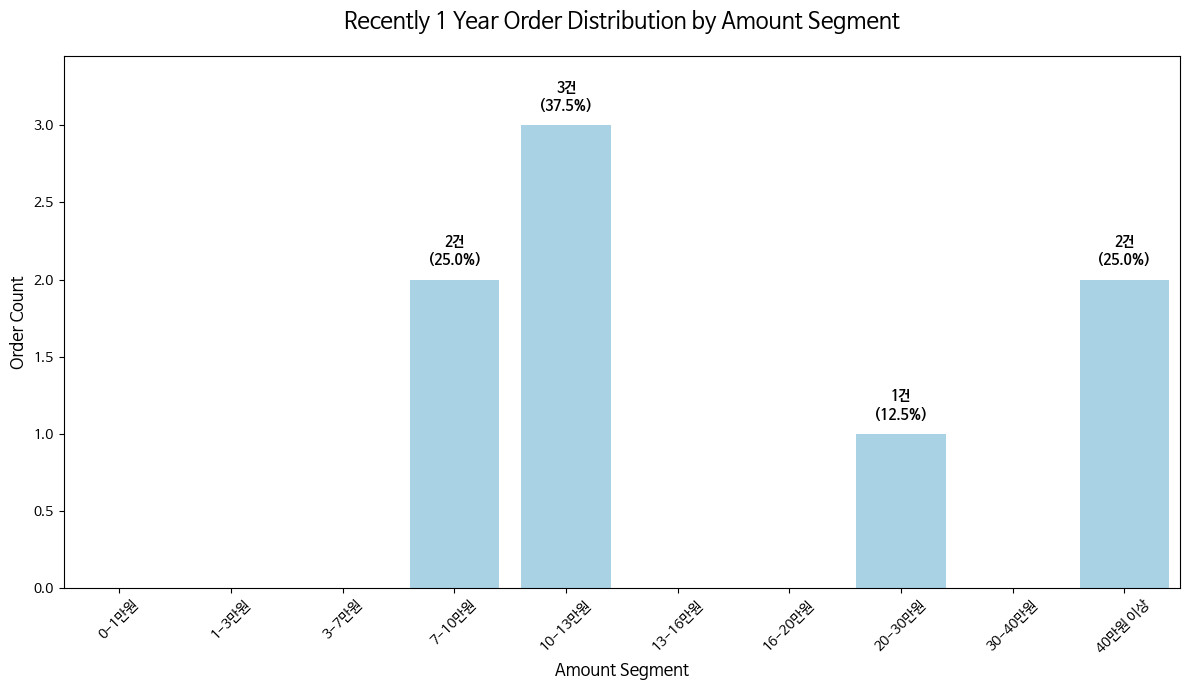

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')


# 1. 최근 1년 객단가 시각화
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=segment_1y, x='금액구간', y='주문건수', color='skyblue', alpha=0.8)

# 차트 제목 및 라벨 설정
plt.title('Recently 1 Year Order Distribution by Amount Segment', fontsize=16, pad=20)
plt.xlabel('Amount Segment', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.xticks(rotation=45)

# 바 상단에 비중(%) 라벨 표시
for i, p in enumerate(ax.patches):
    count = segment_1y.iloc[i]['주문건수']
    percent = segment_1y.iloc[i]['비중(%)']

    # f-string을 사용하여 건수와 비중을 결합 (콤마 포맷팅 포함)
    label = f"{int(count):,}건\n({percent}%)"

    ax.annotate(label,
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom',
                 fontsize=10,
                 fontweight='bold',
                 xytext=(0, 8),
                 textcoords='offset points')

# y축 범위를 텍스트가 잘리지 않게 살짝 높임
plt.ylim(0, segment_1y['주문건수'].max() * 1.15)


plt.tight_layout()
plt.savefig('aov_distribution.png')
plt.show()